# NLTK 자연어 처리 패키지

NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다. **파이썬에서 언어 분석할 때, 가장 많이 쓰이는 패키지이다.**

NLTK 패키지가 제공하는 주요 기능은 다음과 같다.

* 말뭉치
* 토큰 생성
* 형태소 분석
* 품사 태깅

## 말뭉치

대부분의 Text관련된 패키지들은 sample corpus를 제공을 한다. <br>
영어는 다양한 corpus가 있다. 한글은 거의 전무하다. <br>
웹 크롤링으로 수집해서 사용하던, 샘플 corpus를 사용해야 한다.

말뭉치(corpus)는 자연어 분석 작업을 위해 만든 ***샘플 문서 집합***을 말한다. 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사. 형태소, 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다. NLTK 패키지의 `corpus` 서브패키지에서는 다양한 연구용 말뭉치를 제공한다. 이 목록은 전체 corpus의 일부일 뿐이다. 말뭉치 자료는 설치시에 제공되지 않고 `download` 명령으로 사용자가 다운로드 받아야 한다. `nltk.download("book")` 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다. 

#### step1 : 샘플 말뭉치 다운로드

In [3]:
import nltk
nltk.download("book", quiet=True)
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")
from nltk.book import *

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sanghyuk/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sanghyuk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanghyuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### step: 구텐베르그 말뭉치 목록

예를 들어 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치에는 다음과 같은 작품이 샘플로 포함되어 있다.

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

이 중 제인 오스틴의 엠마 문서를 살펴보면 다음과 같이 원문 형태 그대로를 포함하고 있다.

In [13]:
type(emma_raw)

str

In [5]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
# 1302글자
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성

**토큰화** : 토큰으로 만든다. <br>
토큰은 텍스트를 쪼갠 하나하나의 벽돌같은 단위를 의미한다. <br>
**토큰** : 작은 단위? 그것은 정의하기 나름이다. 문장을 토큰이라고 하고 싶을 수도 있고(마침표), 단어를 토큰으로 나누고 싶을 수도 있다(스페이스나 공백).<br>
- 대부분의 경우에는 단어를 토큰으로 쓰는 경우가 일반적이다. 
- 영어: 의미가 같은 **정규화**된 단어.
<pre>
I am a boy => I + am + a + boy + . 
</pre>

- 한글은 주로, 형태소(의미를 가진 최소한의 단위)를 토큰으로 쓴다. <br>
- 국어: 의미가 같은 **정규화**된 형태소.
<pre>
나는 소년이다. => 나(대명사) + 는(조사) + 소년(명사) + 이(보조사) + 다(어미). 
</pre>

근데 **정규화**가 뭐야? <br>
- 정규화(Normalization)
    - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시
    - 의미와 쓰임이 다른 단어는 다른 토큰으로 표시
        - *I am a boy*
        - *Am I a boy?*
        - 하나는 a가 소문자고, 하나는 대문자야. 다른 단어로 분류될텐데, 쓰임이 다른건가? 똑같은 토큰으로 나타내야겠지. 
    - 더 나아가서 '
        - *I am, He is, We are*. am/is/are 의미가 다른가? 주어에 따라 그냥 문법이 달라진 것. 의미는 같다. 하나의 토큰으로 표시해야 된다. "be"이런식으로 표시될 수 있겠지. 
        - 즉, 실제 쓰인 단어와, 토큰으로 표시된 토큰 이름과 반드시 일치할 필요는 없다.
        
    - 토큰의 명칭 
        - 토큰의 이름은 실제 토큰의 활용과 관계가 없다. 
        - 숫자 혹은 기호로 나타내거나, 
            - ex) be 동사는 573으로 쓰겠다. 그럼, 그렇게 쓰는거지. 
        - 품사 등을 덧붙여서 쓰는 경우도 있다. 
            - fly를 쓰면, 날다? 파리? 토큰으로 쓸때는, 토큰의 명칭을 fly/V, fly/N 이런식으로 동사 명사임을 밝히면서 토큰 이름을 쓸 수도 있는거야. 
             
             
- 실제 정규화 과정
    - 이렇게 의미와 쓰임이 같은 단어는 같은 토큰으로, 다른 단어는 다른 토큰으로 만들수 있도록 전처리해주는 작업을 정규화 라고 한다. 
        - 대소문자 통합(case removal) *Am = am*
        - 표제어 추출(lemmaization)
            - 표제어라는 것은 사전에 나와있는 단어를 의미한다. 
            - am/is/are/was/were/been => **be**
            - has/had => have
            - 사전에 나와있는 표제어를 쓰는 것이 가장 좋긴 한데, 사실 이것도 쉬운 알고리즘이 아니다. 
            - 이 표제어 추출이 엄청 복잡하니깐, 복잡한 것 쓰기 전에 간단한 것 만들어 보자 한게 어간추출이야. 
            - 사전정보(WordNet) 사용
        - 어간 추출(stemming) 
            - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체하는 과정. 
            - 어간(stem) : 단어의 의미를 단고 있는 핵심부분
            - 접사(affix): 단어에 부가적인 의미를 주는 부분
            - 어간과 접사를 구분해서, 접사를 없애버리는 것이 어간추출. 
                - I fly, she flies, she flew 
                - 얘네들 동의어로 표시되야지. 
                - ex) 아래, fly/flies/flew에서 뒤에 다 없애고 토큰 그냥 fl로 써버린다. 
            - 단순 알고리즘 사용(그렇게 엄청 단순하진 않다) 
                - 포터(Porter) 알고리즘
                - 랭케스터(Langcaster) 알고리즘
        - 품사 부착(Part-Of-Speech tagging)
            - 품사 : 단어의 쓰임에 대한 구분
            - 동일한 철자의 단어가 다른 의미나 품사로 쓰이는 경우는 다른 토큰으로 토큰화 해야 한다. 
                - 예) Permit : 허락하다(V), 허가증(N), Refuse: 거부하다(V), 쓰레기/배출(N)
        - 불용어(stopwords)
            - 분석의 필요성이 없는 단어. 
            - 모든 문서에서 너무 자주 쓰이는 단어 혹은 너무 드물게 나타나는 단어. 
                - 예) 영어에서 관사 the/an/a 등. 한국어에서 은/는/이/가, 다 등. 
                - 예) 전 코퍼스 통틀어서 딱 1번 있고 그런 것.
        - 이런것들을 정규화 과정에서 기본적으로 하게 된다. 

자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다. 이 문자열 단위를 토큰(token)이라고 하고 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 한다. 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다. 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

In [25]:
from nltk.tokenize import sent_tokenize
for i, j in enumerate(sent_tokenize(emma_raw[:1000])):
               print(i, j)

0 [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.
1 She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.
2 Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.
3 Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.
4 Between _them_ it was more the intimacy
of sisters.
5 Even before Miss Taylor had ceased to hold the nominal
office of governess, the mil

In [4]:
# sentence tokenize
# 마침표로 끊어준다.
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [26]:
# 단어별로 끊어주는 word_tokenize
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [27]:
# 정규표현식을 사용할 수 있게 해줌. 

from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

형태소(morpheme)는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻한다. 보통 자연어 처리에서는 토큰으로 형태소를 이용한다. 형태소 분석(morphological analysis)이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다. 형태소 분석의 예로는 다음과 같은 작업이 있다.

* 어간 추출(stemming)
* 원형 복원(lemmatizing)
* 품사 부착(Part-Of-Speech tagging)

 ### 어간 추출과 원형 복원

어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다. NLTK는 `PorterStemmer`  `LancasterStemmer` 등을 제공한다. 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다. 

In [29]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


위에 보면, 다 똑같이 바뀌진 않잖아. flew/flown 이렇게 되잖아. <br>
이게 Porter/Lancaster 알고리즘의 한계이다. <br>
원래는 다 바뀌는게 맞긴 한지.<br>

진짜 정확히 쓰고 싶으면, 사전을 찾아야돼. <br>
Porter/Lancaster는 원시적인 수준이다. <br>

원형 복원(lemmatizing)은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다. 품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.<br>
그리고, 아까 보면, fly가 '날다'일 수도 있고 '파리'일 수도 있잖아. <br>
***내가 지금 넣는 단어들이 Verb야 라고 지정을 해준 것.***

In [30]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

이렇게 다 fly로 바뀌는게 정상이긴 하지. 근데, 시간이 엄청 오래걸리는게 문제야. 

## 품사 부착

품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다. 품사의 구분은 언어마다 그리고 학자마다 다르다. 예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용한다. 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예이다.

* NNP: 단수 고유명사
* VB: 동사
* VBD: 동사의 과거형
* VBP: 동사 현재형
* TO: to 전치사
* NN: 명사(단수형 혹은 집합형)
* DT: 관형사

`nltk.help.upenn_tagset` 명령으로 자세한 설명을 볼 수 있다.

In [9]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


`pos_tag` 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다. 다음 예문에서 refuse, permit이라는 같은 철자의 단어가 각각 동사와 명사로 다르게 품사 부착된 것을 볼 수 있다.

In [32]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"

# tokenize해서 끊은 다음에, 각각에 태킹을 한 것. 
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

아니 엄청 신기한게, 똑같은 refuse고 permit인데, 지가 알아서 태깅을 해주네. <br>
문맥을 알아서 봐주네. <br>
최종 경과물이 튜플의 리스트로 나오네.

품사 태그 정보를 사용하면 명사인 토큰만 선택할 수 있다.

In [11]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

`untag` 명령을 사용하면 태그 튜플을 제거할 수 있다.

In [12]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많은데 
이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있다.

In [34]:
# 실제로 이렇게 태깅하는게 많이 쓰인다.

def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

실제로 이렇게 많이 쓰인다.

### stopwords

In [35]:
from nltk.corpus import stopwordsords

영어 중에서, 크게 의미 없는 친구들을 알려준다.

In [39]:
stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

## 빈도분석

해당 단어가 언제 얼마나 쓰였는지에 대한 분석<br>
빈도분석을 위해서 아래의 2가지 클래스를 제공한다.<br>

## Text 클래스

코퍼스를 그대로 집어 넣으면, 
- plot: 단어 빈도 그래프 
- dispersion_plot : 단어 위치 그래프
- concordance : 단어 문맥 인쇄
- similar : 유사 단어 검색 

#### step 1: 클래스 객체 생성

NLTK의 `Text` 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.<br>
원문을 tokenize한 것을 집어넣어야 한다.

In [41]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))

In [42]:
text[:5]

['Emma', 'by', 'Jane', 'Austen', '1816']

`plot` 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

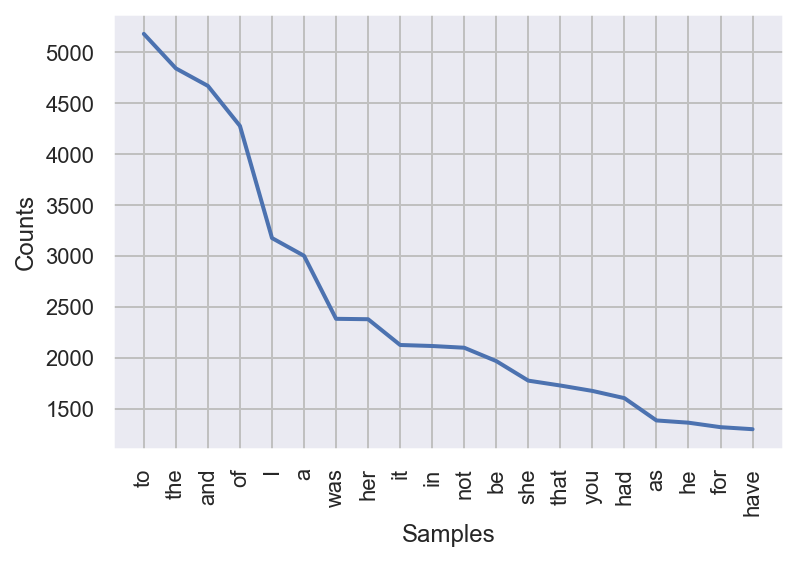

In [43]:
# 20은 가장 많이 사용되는 20개를 그리라는 것.
text.plot(20)
plt.show()

`dispersion_plot` 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

Word Offset: 원문 그대로 위치. <br>
몇번째에 쓰였는지에 대한 위치임. 그게 x축. <br>
전체가 약, 160000개 단어로 되어 있다는 것. <br>
딱 그 n번째에 단어가 있으면, n번째에 선을 그리는 그래프

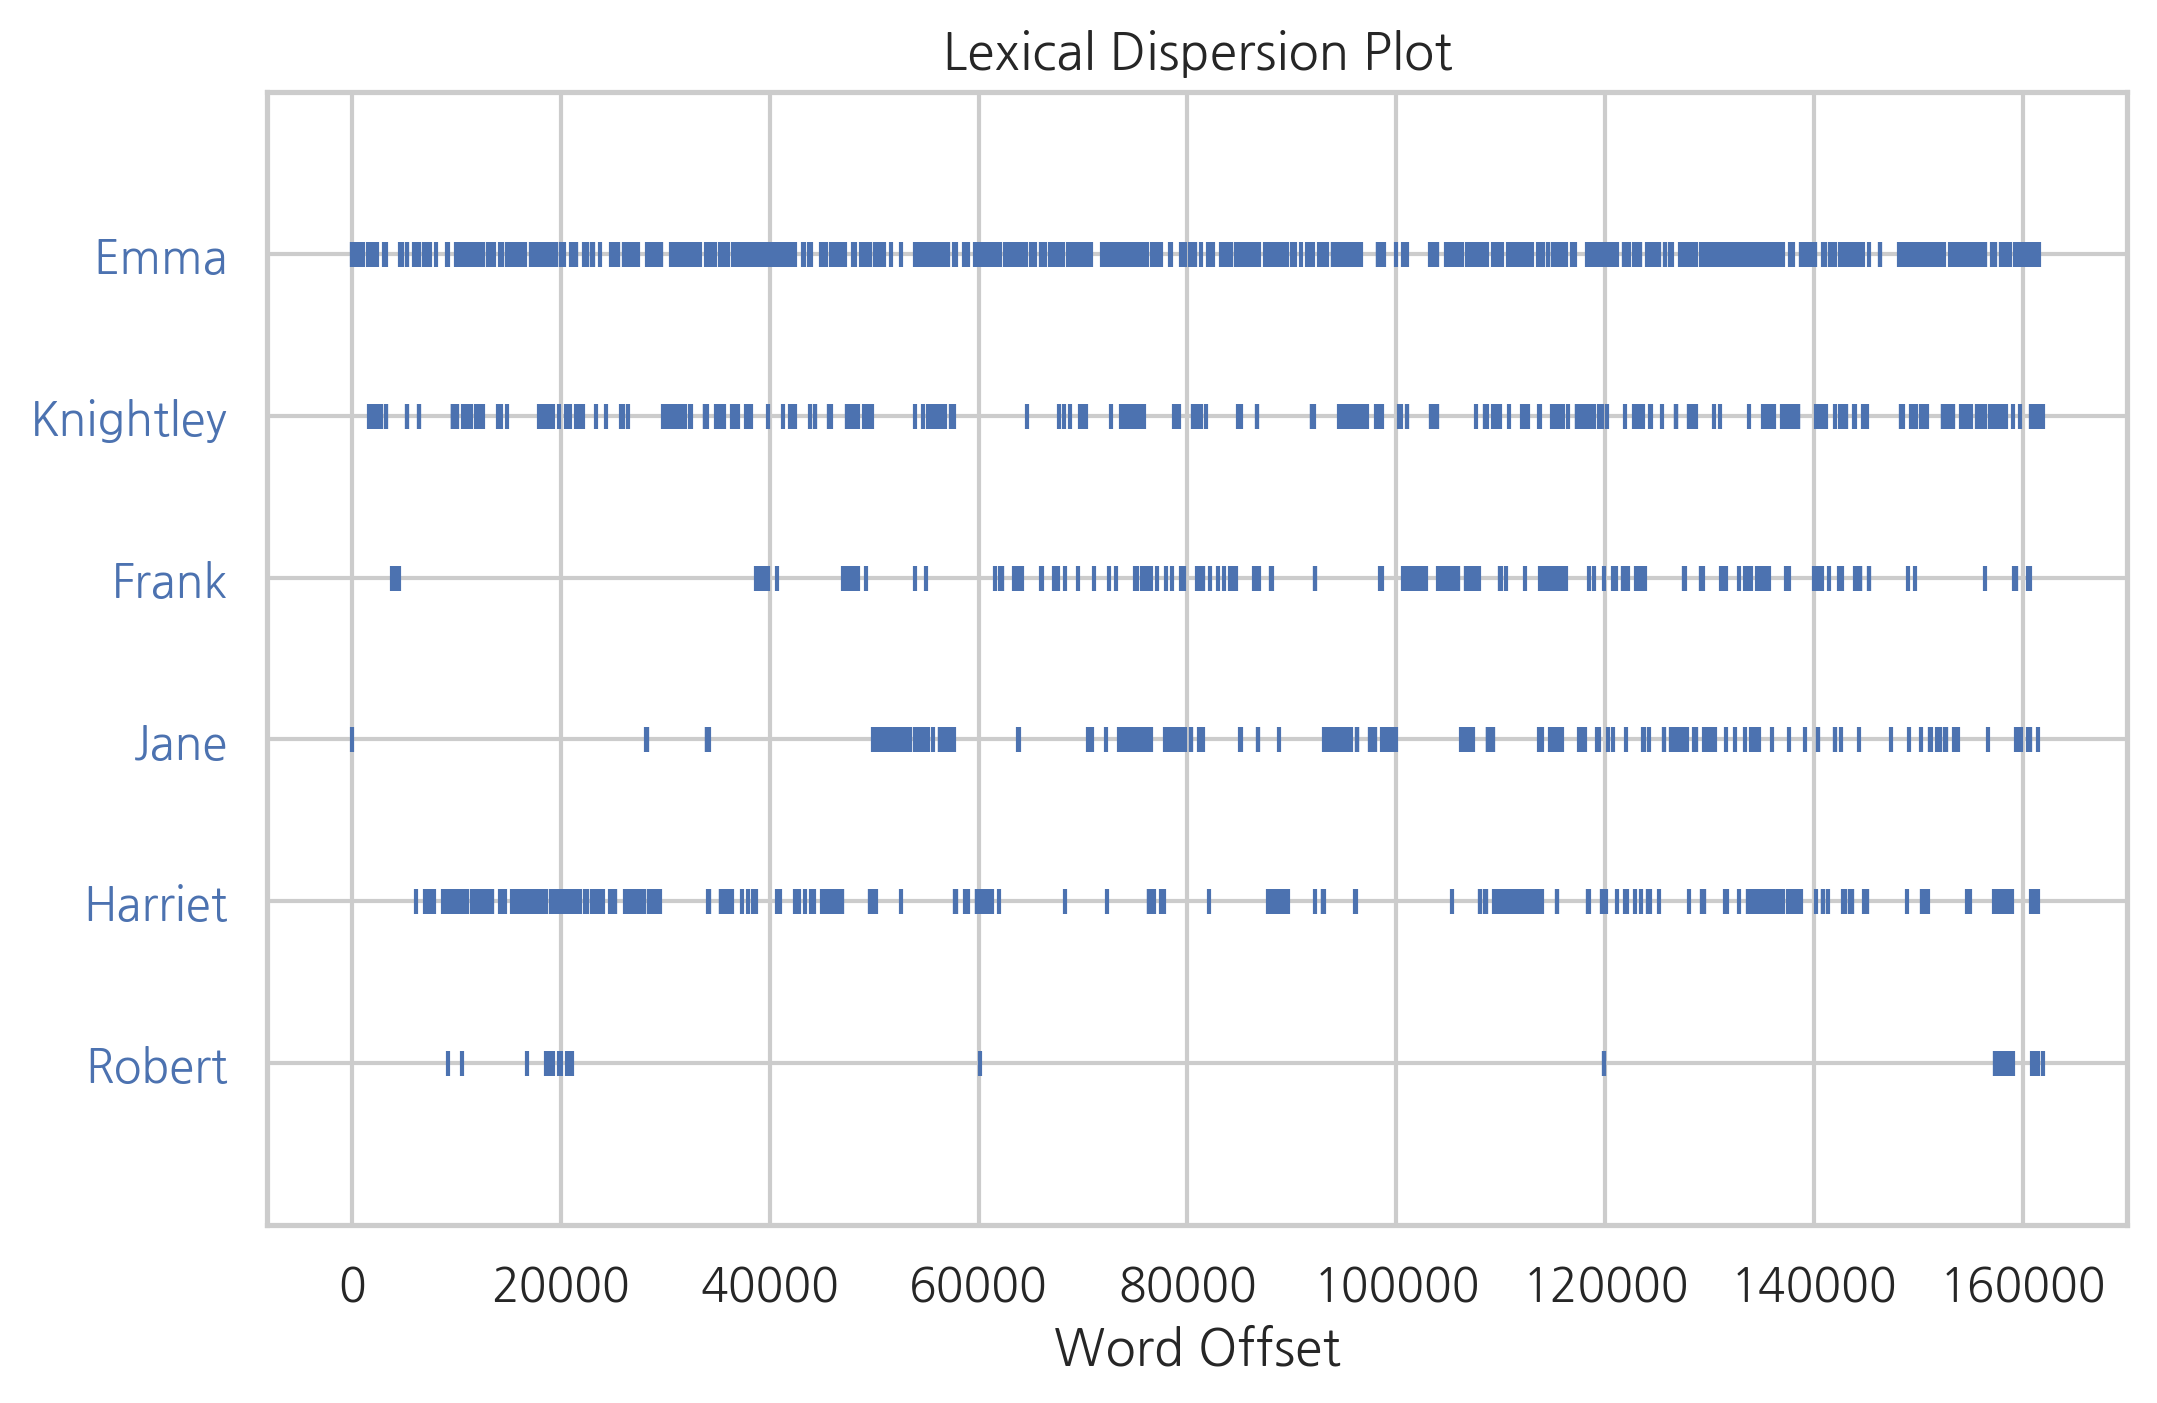

In [16]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

해당 단어가 쓰인 앞/뒤를 문맥이라고 이야기 한다. <br>
그 앞 뒤를 print해 주는 것.<br>
**Window**라는 용어도 쓴다. <br>
**Window=1**이면, 앞에 한단어 뒤에 한단어를 의미하고, **Window=2**이면, 앞에 두단어 뒤에 두단어를 의미한다. <br>

*nltk에서는 기본으로는 window 1이 기본, 앞 뒤 한단어씩이 문맥으로 취급된다.*<br>
경우에 따라서, window 10개씩 되고 이런 경우도 많다.

`concordance` 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [17]:
text.concordance("Emma")

# emma가 총 855번 쓰인 것. 

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

유사단어 검색 
- 같은 문맥에서 쓰인 다른 단어를 찾아낸다. 
- 예를 들어, Emma의 앞 뒤를 다 본다음에, Emma랑 같은 문맥을 가지고 쓰인 다른 단어들을 찾아내는 것.
- Emma라는 것과 앞뒤가 똑같은게 가장 많은 애를 찾는 것. 
- nltk에서는 window 1을 기준으로 한다. 
- but she was, but emma was //// and she i, and emma i -> 이런거를 싹다 counting 하는 것.

`similar` 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다. 

In [18]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [44]:
# 가장 많이 쓰인 1위만 가져오라는 것.
text.similar("Emma", 1)

she


공통 문맥 인쇄
- Emma, She가 공통으로 쓰인 context중에서, 가장 많이 쓰인 context가 무엇인지를 검색.

두 단어의 공통 문맥을 보려면 `common_contexts` 메서드를 사용한다.

In [46]:
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [47]:
text.common_contexts(["Emma", "she"], 1)

said_i


said Emma i, said she i -> 이게 공통적으로 많이 쓰였다는 것.

## FreqDist

`FreqDist` 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. `Text` 클래스의 `vocab` 메서드로 추출할 수 있다.

- 빈도 분석에 유용한 여러가지 메서드를 제공한다. 
    - N: 빈도(횟수)
    - freq: 빈도(퍼센트)
    - most_common : 가장 많이 나오는 단어
    - plot: 가장 많이 나오는 단어 플롯

In [20]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

또는 다음처럼 토큰 리스트를 넣어서 직업 만들 수도 있다. 다음 코드에서는 Emma 말뭉치에서 사람의 이름만 모아서 `FreqDist` 클래스 객체를 만들었다. 품사 태그에서 `NNP`(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [53]:
from nltk import FreqDist



stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

# 사람이름이면서, stopwords만 뺀거야. 이름 리스트 만든 것. 
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

`FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [54]:
len(names_list)

7863

In [50]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

1. 사람 이름 총 몇번?
2. Emma는 총 830번
3. 전체 내가 넣은 단어중 10%(830/7863 = 0.1) 

`most_common` 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [55]:
# 가장 빈도 높은 5개를 찾는다.
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

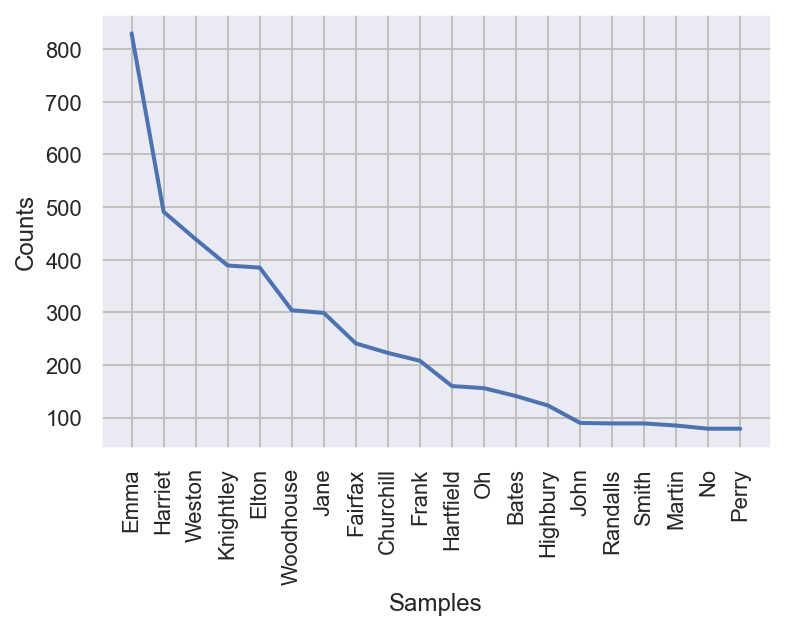

In [56]:
fd_names.plot(20)
plt.show()

## 워드클라우드

wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

In [58]:
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [57]:
# pip install wordcloud

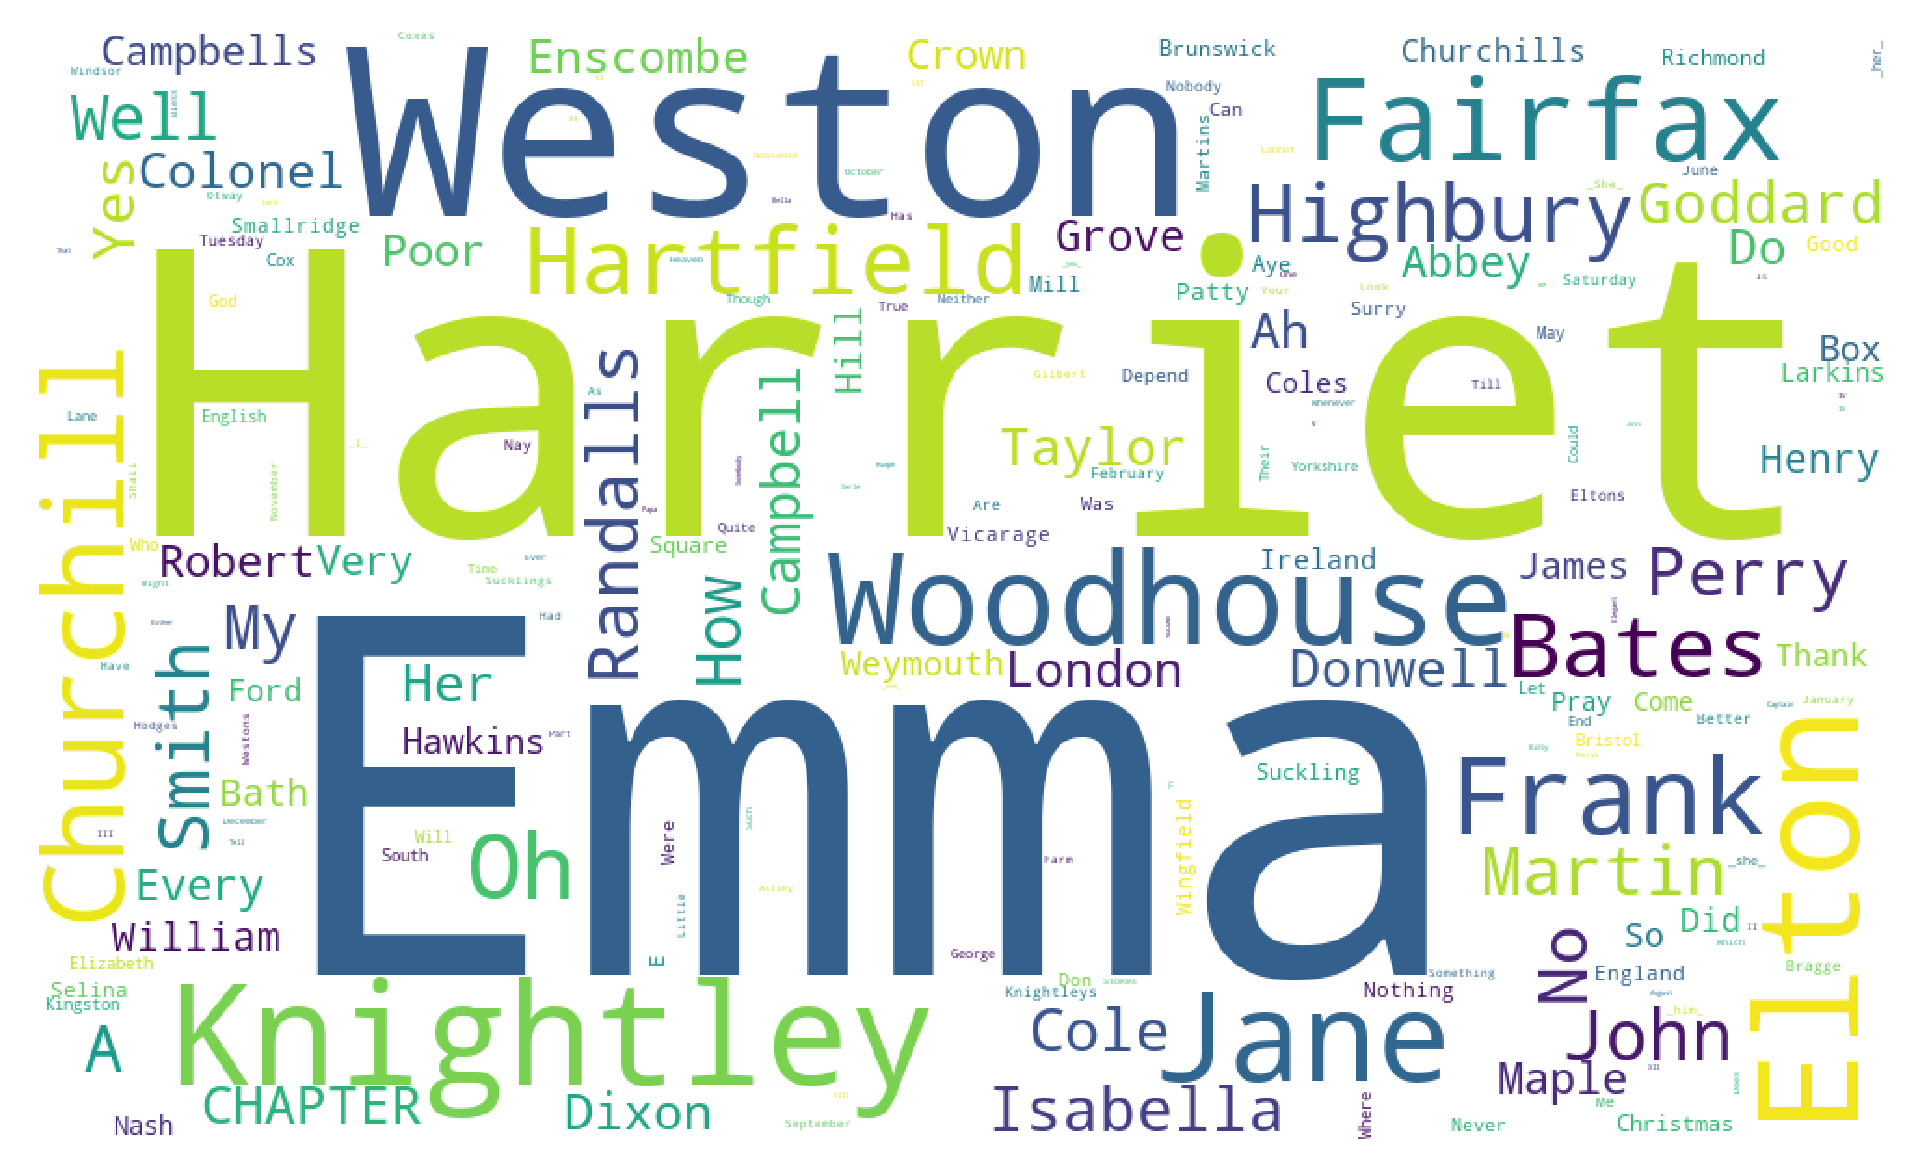

In [24]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

실습

In [12]:
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import RegexpTokenizer

In [13]:
bible_kjv = nltk.corpus.gutenberg.raw("bible-kjv.txt")

In [14]:
from nltk import FreqDist



stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
retokenize = RegexpTokenizer("[\w]+")
bible_kjv_tuple = pos_tag(retokenize.tokenize(bible_kjv))

# 사람이름이면서, stopwords만 뺀거야. 이름 리스트 만든 것. 
bible_names_list = [t[0] for t in bible_kjv_tuple if t[1] == "NNP" and t[0] not in stopwords]
bible_names = FreqDist(bible_names_list)

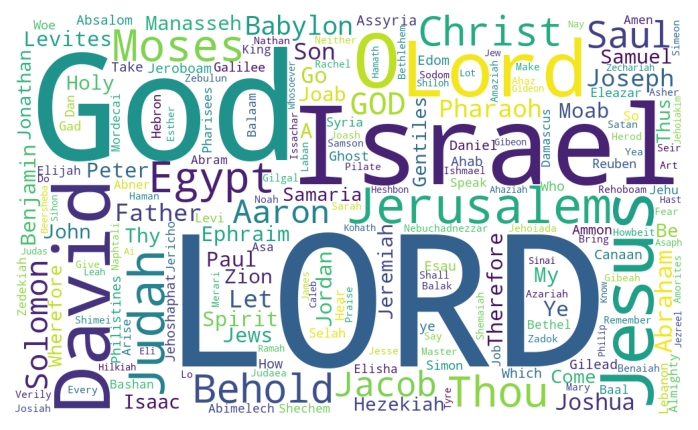

In [15]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(bible_names))
plt.axis("off")
plt.show()

# KoNLPy 한국어 처리 패키지

KoNLPy(코엔엘파이라고 읽는다)는 한국어 정보처리를 위한 파이썬 패키지이다. 

In [1]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.2'

## 한국어 말뭉치

KoNLPy 기능은 2가지 밖에 없다. 
- 샘플말뭉치 
    - kolaw : 헌법말뭉치 
    - kobill 법안말뭉치 

- 한글 형태소 분석기 
    - KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.
    - 사실 이 형태소 분석기도 정확한 형태소 분석기 라기보다는, 다른데서 만든 형태소 분석기를 파이썬에서 사용할 수 있도록 wrapping 한것에 지나지 않음.
    - 즉, C/Java같은데서 사용하는 것 그냥 파이썬에서 사용할 수 있도록 만들어 놓은 것.

KoNLPy에서는 대한민국 헌법 말뭉치인 `kolaw`와 국회법안 말뭉치인 `kobill`을 제공한다. 각 말뭉치가 포함하는 파일의 이름은 `fields` 메서드로 알 수 있고 `open` 메서드로 해당 파일의 텍스트를 읽어들인다.

In [9]:
from konlpy.corpus import kolaw
kolaw.fileids()

# 1개 밖에 없음.

['constitution.txt']

In [10]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


In [5]:
from konlpy.corpus import kobill
kobill.fileids()

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [11]:
d = kobill.open('1809890.txt').read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



## 형태소 분석

KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발.
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text

여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다(실제로도 이 3개가 제일 많이 쓴다).

In [8]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()
okt = Okt()

이 클래스들은 다음과 같은 메서드를 공통적으로 제공한다.

* `nouns` : 명사 추출
* `morphs` : 형태소 추출
* `pos` : 품사 부착

### 명사 추출

문자열에서 명사만 추출하려면 `noun` 명령을 사용한다.

In [13]:
c[:40]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로'

In [14]:
# 진짜 명사만 추출하네
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

분석기에 따라 결과가 다름<br>
kkma처럼, 대한/대한민국/대한민국헌법 일허게 따로 뽑는 것은 ***ngram*** 이라고 한다.

In [15]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [16]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [17]:
"\n".join([s for s in c[:40].split("\n") if s])

'대한민국헌법\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로'

In [18]:
# komoran은 빈줄이 있으면 에러가 남
komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [19]:
# mecab.nouns(c[:40])

NameError: name 'mecab' is not defined

### 형태소 추출

명사 뿐 아니라 모든 품사의 형태소를 알아내려면 `morphs`라는 명령을 사용한다.

In [20]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [21]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [22]:
# komoran은 빈줄이 있으면 에러가 남
komoran.morphs("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [23]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [ ]:
#mecab.morphs(c[:40])

속도는 okt가 좀 빠르고, 성능은 hannaum, kkma가 좀 낫다. <br>
실제로 성능과 속도가 trade-off가 있다.

### 품사 부착

`pos` 명령을 사용하면 품사 부착을 한다. 

한국어 품사 태그세트로는 "21세기 세종계획 품사 태그세트"를 비롯하여 다양한 품사 태그세트가 있다. 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.

- 한국어 품사 태그세트로는 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다. 
- 부착되는 품사 태그의 기화와 의미는 `tagset`속성으로 확인할 수 있다.

In [24]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [25]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [26]:
# komoran은 빈줄이 있으면 에러가 남
komoran.pos("\n".join([s for s in c[:40].split("\n") if s]))

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [27]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [ ]:
#mecab.pos(c[:40])

부착되는 품사 태그의 기호와 의미는 `tagset` 속성으로 확인할 수 있다.

In [28]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [32]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [31]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [30]:
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
# tagsets["Mecab-기호"] = list(mecab.tagset.keys()) + list("*" * (N - len(mecab.tagset)))
# tagsets["Mecab-품사"] = list(mecab.tagset.values()) + list("*" * (N - len(mecab.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

Hannanum-기호 Hannanum-품사 Kkma-기호     Kkma-품사 Komoran-기호 Komoran-품사  \
0            E          어미      EC       연결 어미         EC      연결 어미   
1           EC       연결 어미     ECD   의존적 연결 어미         EF      종결 어미   
2           EF       종결 어미     ECE    대등 연결 어미         EP      선어말어미   
3           EP       선어말어미     ECS   보조적 연결 어미        ETM  관형형 전성 어미   
4           ET       전성 어미      EF       종결 어미        ETN  명사형 전성 어미   
..         ...         ...     ...         ...        ...        ...   
62           *           *     XPV      용언 접두사          *          *   
63           *           *      XR          어근          *          *   
64           *           *     XSA  형용사 파생 접미사          *          *   
65           *           *     XSN    명사파생 접미사          *          *   
66           *           *     XSV   동사 파생 접미사          *          *   

         OKT-기호 OKT-품사  
0     Adjective    형용사  
1        Adverb     부사  
2         Alpha    알파벳  
3   Conjunction    접속사  
4    Determiner    관형사  
..          ...    ...  
62            *      *  
63            *      *  
64            *      *  
65            *      *  
66            *      *  

[67 rows x 8 columns]

### 앞에서 했던 것을 똑같이 이용할 수 있다.

koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.

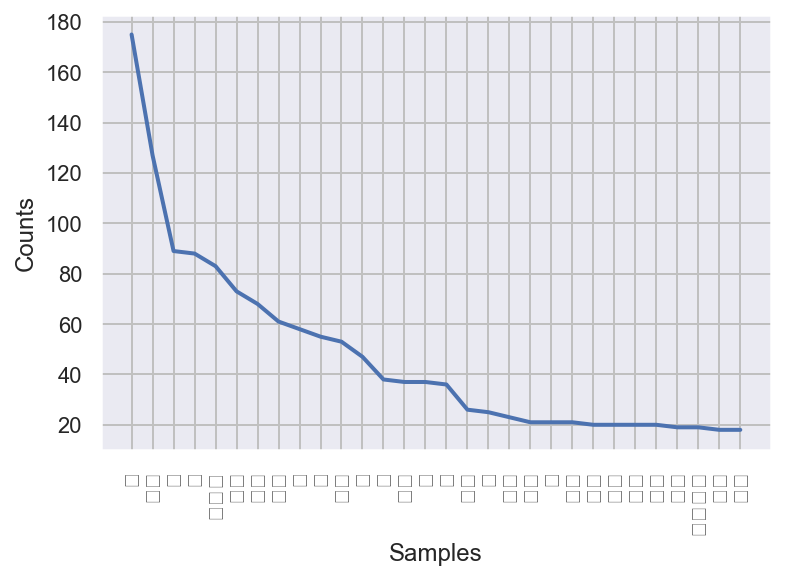

In [33]:
from nltk import Text

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

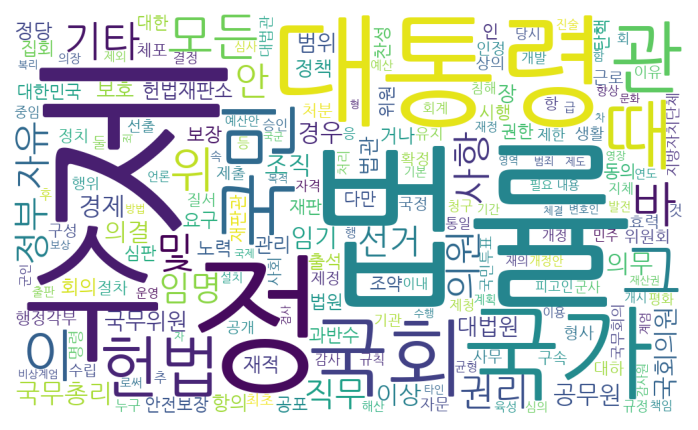

In [37]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/Users/sanghyuk/Library/Fonts/NanumGothic-Regular.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

### Komoran 사용자 사전 추가

konlpy로 분석을 할 때, 고유명사가 들어가면, 제대로 판단을 못하는 경우가 자주 생김 <br>

In [38]:
sentence ='자유한국당, "박근혜-최순실 국저어농단 테블릿 PC는 거짓"이라고 주장'

sentence

'자유한국당, "박근혜-최순실 국저어농단 테블릿 PC는 거짓"이라고 주장'

위 문장에 대해 품사 분석을 진행하면, `최순실`이라는 고유명사가 사전에 없기 때문에 다음과 같이 잘못 분석된다. 


In [39]:
from konlpy.tag import Komoran
komoran = Komoran()
komoran.pos(sentence)

[('자유', 'NNG'),
 ('한국당', 'NNP'),
 (',', 'SP'),
 ('"', 'SS'),
 ('박근혜', 'NNP'),
 ('-', 'SS'),
 ('최순', 'NNP'),
 ('실', 'NNP'),
 ('국', 'NNG'),
 ('저어', 'NNG'),
 ('농', 'NNG'),
 ('단', 'NNG'),
 ('테블릿', 'NA'),
 ('PC', 'SL'),
 ('는', 'JX'),
 ('거짓', 'NNG'),
 ('"', 'SS'),
 ('이라고', 'JKQ'),
 ('주장', 'NNG')]

이 문제는 사용자 사전을 추가함으로 해결할 수 있다. Komoran을 이용 할 때는 비교적 손쉽게 사용자 사전을 추가할 수 있다. 참조하고 싶은 단어와 그 품사를 txt파일로 만들어 객체를 생성할 때 userdic 인수에 txt파일의 경로를 입력하면 된다. 이 때, txt 파일 내에서 단어와 품사는 텝(tab)으로 구분된다. 다음은 추가할 `user_dic.txt` 파일 의 내용이다.

In [40]:
!cat './user_dic.txt'

최순실	NNP

Komoran 객체를 다시 생성하며 userdic 인수에 이 파일 경로를 입력하면 다음과 같이 원하는 대로 품사 분석이 이루어 진다. 

In [42]:
komoran = Komoran(userdic='./user_dic.txt')
komoran.pos(sentence)

# 최순실이 제대로 나왔다.

[('자유', 'NNG'),
 ('한국당', 'NNP'),
 (',', 'SP'),
 ('"', 'SS'),
 ('박근혜', 'NNP'),
 ('-', 'SS'),
 ('최순실', 'NNP'),
 ('국', 'NNG'),
 ('저어', 'NNG'),
 ('농', 'NNG'),
 ('단', 'NNG'),
 ('테블릿', 'NA'),
 ('PC', 'SL'),
 ('는', 'JX'),
 ('거짓', 'NNG'),
 ('"', 'SS'),
 ('이라고', 'JKQ'),
 ('주장', 'NNG')]

형태소 분석기마다 다 사용자 단어를 추가할 수 있다. 다만, 방법이 다 다르고 조금 복잡하다. <br>
필요할 때 찾아서 하자.

# Scikit-Learn의 문서 전처리 기능

## BOW 인코딩

[reference](https://wikidocs.net/22650#:~:text=Bag%20of%20Words%EB%9E%80%20%EB%8B%A8%EC%96%B4,%EB%93%A4%EC%9D%98%20%EA%B0%80%EB%B0%A9%EC%9D%B4%EB%9D%BC%EB%8A%94%20%EC%9D%98%EB%AF%B8%EC%9E%85%EB%8B%88%EB%8B%A4.)

문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW(Bag of Words) 인코딩 방법이다. BOW 인코딩 방법에서는 전체 문서 $\{d_1, d_2, \ldots, d_n\}$(말뭉치) 를 구성하는 고정된 단어장(vocabulary) $\{t_1, t_2, \ldots, t_m\}$ 를  만들고 $d_i$라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

$$ x_{i,j} = \text{문서 $d_i$내의 단어 $t_j$의 출현 빈도} $$ 

또는

$$ x_{i,j} = 
\begin{cases}
0, & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 없으면} \\
1. & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 있으면}
\end{cases}
$$


## Scikit-Learn 문서 전처리 기능

Scikit-Learn의 `feature_extraction` 서브패키지와 `feature_extraction.text` 서브패키지는 다음과 같은 문서 전처리용 클래스를 제공한다.

* [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html):

  * 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.

* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): 

  * 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

* [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): 

  * `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

* [`HashingVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html): 

  * 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

### DictVectorizer

이거는 내가 수동으로 counting을 해서, 딕셔너리로 만들어 놔야 한다.<br>
각 딕셔너리가 문서 하나를 의미한다.

`DictVectorizer`는 `feature_extraction` 서브패키지에서 제공한다. 문서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환한다.

In [44]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [45]:
# Vocabulary
v.feature_names_

['A', 'B', 'C']

이 만들어놓은 v객체 안에, D라는 voca list에 없던 애를 넣으면? <br>

없는 것으로 처리된다.<br>
즉, 처음에 fitting을 했을 때, 없었던 단어는 나중에는 그냥 없는 것으로 처리된다.<br>
그래서, 맨 처음 fit할때, 왠만하면 모든 단어가 들어가 있는 것으로 코퍼스를 만들어야 한다.

In [46]:
v.transform({'C': 4, 'D': 3})

array([[0., 0., 4.]])

In [48]:
v.feature_names_

['A', 'B', 'C']

근데, 이거는 내가 수동으로 dict를 만들어야되잖아.<br>
그게 귀찮으니깐, 그것까지 해주는 걸 만든거야.

### CountVectorizer

`CountVectorizer`는 다음과 같은 세가지 작업을 수행한다.

1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다. 


즉, 여기서는 문서를 넣어주기만 하면 된다.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

# 이 아래서 9는 횟수가 아니야. 
# 9번 단어라는 뜻.
# 단어의 index 위치를 의미한다.

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [54]:
vect.transform(['This is the second document.', 'Something completely new.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [50]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [55]:
# 여기서도 애초에 voc에 없던 것은 없는 것으로 간주. 
# 그래서 맨 처음 fitting시킬 때, 코퍼스가 중요하다.

vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [52]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

`CountVectorizer`는 이러한 작업을 하기 위한 다음과 같은 인수를 가질 수 있다. 

* `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
 * stop words 목록.‘english’이면 영어용 스탑 워드 사용.
* `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
 * 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램 
* `token_pattern` : string
 * 토큰 정의용 정규 표현식 
* `tokenizer` : 함수 또는 None (디폴트)
 * 토큰 생성 함수 .
* `ngram_range` : (min_n, max_n) 튜플
 * n-그램 범위 
* `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
 * 단어장에 포함되기 위한 최대 빈도
* `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수.  디폴트 1
 * 단어장에 포함되기 위한 최소 빈도 


## Stop Words

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. `stop_words` 인수로 조절할 수 있다.

In [56]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

이 아랫부분이 신기한게, "english"라고 하면, <br>
영어에서 자주 사용하는 stopwords를 지가 알아서 솎아서 없앰. 

In [58]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

## 토큰

 `analyzer`, `tokenizer`, `token_pattern` 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

analyzer에서 character단위로 tokenize할 수 있는 기능이 추가되어 있음. 

In [19]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

token_pattern에는, 토큰 구분할 때, regular expression을 사용할 수 있게 해준다. 

In [59]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

그 외에 외부 tokenizer가져다가 쓰고 싶으면, <br>
아래처럼 함수로 넣으면 해준다.

In [60]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

## N그램

단어 하나가 토큰 하나가 되는 것이 $MonoGram$. <br>
$bigram$은 두개의 연결된 토큰이 하나의 단어가 되는 것.<br>
아래 예시가 있다.<br>

예를 들면, "참 좋아", "참 나빠" 이러면 참만 가지고 알 수가 없잖아.<br>
즉, Phrase를 가지고 토큰으로 사용하겠다는 것과 같은 의미가 되는 것.

N그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

range(a, b)는 a부터 b까지로 해석하면 된다. <br>
range(1, 2)이면, 1부터 2까지 쓰라는 것이고<br>
range(2, 2)이면 2부터 2까지, 즉 2만 쓰라는게 되는 것.

In [22]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

(1, 2) -> 모노그램도 쓰고, 바이그램도 쓰겠다.

In [23]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

## 빈도수

stopwords 를 제낀 이유를 생각해보면, 이 문서 저 문서에 너무 많아서, 분별 역할을 못해서 뺀거 였음. <br>
같은 맥락에서, 지정된 값을 초과해서 많이 나오면, 내가 알아서 제낄 수가 있다. <br>
처음 CountVectorizer 객체 만들때, 사용한 총 코퍼스에서 몇 번 쓰였는가로 판단하는 것.<br>
아래 보면, and는 총 1번, the는 총 5번 나와서 제낀 것.

In [64]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

`max_df`, `min_df` 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 `max_df`로 지정한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다. 

In [65]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [66]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

In [67]:
corpus

['This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?',
 'The last document?']

잘 보면, Vect 객체를 가지고, toarray()를 해서 쓴다. <br>
그 이유는, BOW인코딩의 결과는 Sparse 행렬로 만들어지기 때문. <br>
<pre>
Sparse Matrix라는 것은, 우리가 보통 Matrix를 만들면 크기는 엄청 큰데 대부분은 요소가 0. 
0만 가득 채워서 행렬 만들기에는 메모리가 너무 아깝다. 
Sparse Matrix는 0이 아닌 부분에 대해서만 메모리에 저장하는 Matrix이다.
메모리를 아낄 수 있겠지. Sparse Matrix는 toarray()메서드를 통해 우리가 쓰는 보통의 넘파이 행렬로 변환할 수 있다.
</pre>

## TF-IDF

CounterVectorizer에서는 딱 빈도수 만 가지고 보여주고 인코딩 함. <br>
TF-IDF는 그 숫자를 가지고, 중요도에 따라서 줄인다.<br>
우리가 지금까지 쓴게, TF(term frequency) 거기에 IDF라는 것을 곱하겠다는 것. <br>
*IDF는 그 단어가 쓰인 document가 몇개가 있는가?* 를 의미한다.<br>
예를 들어 이 똑같은 단어가 3개의 document에 쓰였으면, document frequency가 3 인것. <br><br>

그럼 관사같은 애들은 거의 모든 문서에 다 쓰이겠지. 그런애들은 DF가 엄청 크게 나오겠지. <br>
이런애들은 중요하지 않은 단어. 카운트를 작게 만들고 싶은 것. <br>
***역수를 곱하는 것.*** <br>
단, 한번도 안쓰이는 경우나 그런 경우 때문에 혹시 몰라서 앞에 +1을 한 것.<br>
책이나 패키지 마다 IDF만드는 방법이 조금 씩 다른데, 사이킷런에서는 스케일링을 위해 앞에 $Log$도 취해준다.

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t) $$


여기에서

* $\text{tf}(d, t)$: term frequency. 특정한 단어의 빈도수
* $\text{idf}(t)$ : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
 
 $$ \text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)} $$
 
* $n$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

아래를 보면 알겠지만, 1, 2, 3 이런식으로 카운트가 되는게 아니라, <br>
다른 값이 된다. <br>
***이 숫자를 굳이 해석하자면, 카운트가 큰거에 중요도까지 합쳐져 있는 것이지.*** <br>


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## Hashing Trick

실무에서, 우리가 쓰는 Voca Dict가 너무 클 때, 메모리 문제나 속도 문제가 많이 발생함.<br>
그때는 Hashing Vectorizer를 써야 한다.

앞에서, *vect.vocabulary_* 로 쓰던 것이 실무에서는 엄청 커지겠지. <br>
이거를 프로그램이 찾는데 너무 오래걸리지. 단어 하나 나올 때 마다 순차적으로 탐색해갈테니깐. <br>
그래서, 현실적으로는 우리가 앞에서 했던 기본적인 것들 단어가 10000개 넘고 그러면, 사용하기가 어렵다. <br>
그 대신 Hash함수 라는 것을 쓰게 된다.

Hash 함수 라는 것은 우리가 그 함수에 예를 들어 boy라는 글자를 넣으면 <br>
보통은 이 들어온 단어를 0101000 이렇게 bite로 나눈 다음에, 그 순서를 다시 조합하고 그런 방식으로 안에서 여러가지 연산을 다시 한다. <br>
그리고 나서 그 연산의 결과를 가지고 숫자를 뱉어준다. <br>
*어떤 단어를 넣어서 어떤 숫자가 나올 지는 예측이 어렵다. 암호화에 많이 쓰인다*<br>

근데 포인트는 해시 함수에 넣었다가 뱉게 만들 때, 그 해쉬 함수 내부에서 연산속도가 엄청 빠르다. <br>
해시 함수를 쓰면, vocabulary 단어가 얼마나 많든 간에 그 단어를 해시 함수에 넣었다가 빼는 그 시간만 딱 걸리게 된다. <br>
모든 단어를 찾는데 동일한 시간이 걸린다. <br><br>

근데, 가끔 가다가 충돌이 발생한다. 예를 들어, boy/girl 두 단어를 넣었는데 똑같이 3이 튀어나오는 경우가 가끔 있다. <br>
둘다 3이면, 둘을 같은 단어로 취급한다는 것. 가끔 발생 가능. 나중에 이런게 적게 발생하도록 파라미터 조정을 할 수 있다<br>


#### 요약
- 단어에 대한 인덱스 번호를 수식으로 생성 
- 사전 메모리가 없고 및 실행 시간을 줄일 수 있다. 
- 단, 단어의 충돌이 있을 수 있다.
- 현실에서는 이 Hash Vectorizer를 쓰는게 가장 일반적이다. 

`CountVectorizer`는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능해진다. 이 때  `HashingVectorizer`를 사용하면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있다.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [21]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 5.41 s, sys: 136 ms, total: 5.55 s
Wall time: 5.62 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [22]:
twenty_Vector = CountVectorizer().fit(twenty.data)

In [23]:
twenty_Vector.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

In [14]:
%time hv.fit_transform(twenty.data)

CPU times: user 2.09 s, sys: 47.6 ms, total: 2.14 s
Wall time: 2.16 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

In [15]:
hv_vector = hv.fit_transform(twenty.data)

In [17]:
print(hv_vector.shape)
print(hv_vector.toarray()[5000].sum())

(11314, 300000)
0.1980295085953348


`HashingVectorizer doesnt actually remember anything. So there is no vocabulary. It just gets tokens from the supplied documents and then hashes it to get the columns as defined by n_features in constructor:`

## 예

다음은 Scikit-Learn의 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보는 코드이다.

In [87]:
import warnings
warnings.simplefilter("ignore")

import json
import string
from urllib.request import urlopen
from konlpy.utils import pprint
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())

cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [
    w for w in hannanum.nouns(" ".join(cell)) 
    if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
]

HTTPError: HTTP Error 404: Not Found

여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 `CountVectorizer`로 이 문서 집합을 처리하면  각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.

In [29]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

NameError: name 'docs' is not defined

In [30]:
pprint(list(zip(feature_name, count))[:10])

Pretty printing has been turned OFF


## Gensim Package

In [ ]:
`pip3 install gensim`

Gensim의 BOW 인코딩 기능
- Dictionary Class 이용
    - token2id 속성으로 사전 저장
    - doc2bow 메서드로 BOW 인코딩
- TfidModel 클래스를 이용하면 TF-IDF 인코딩도 가능.

In [24]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [25]:
token_list = [[text for text in doc.split()] for doc in corpus]

In [26]:
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

#### Dictionary 객체 생성

In [27]:
from gensim.corpora import Dictionary

In [28]:
dictionary = Dictionary(token_list)
dictionary

In [30]:
# Vocaburary 가 token2id라는 이름으로 저장되어 있음.
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

#### BOW 인코딩

In [32]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 2)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(10, 1), (12, 1), (13, 1)]]

(0, 1) -> 0번 단어가 1번 쓰였다. (1, 1) -> 1번 단어가 1번 쓰였다. 

#### TF-IDF 인코딩

In [35]:
from gensim.models import TfidfModel

In [38]:
tfidf = TfidfModel(term_matrix)
tfidf

In [41]:
for doc in tfidf[term_matrix]:
    print("doc:")
    for k, v in doc:
        print(k, v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.25482305694621393
1 0.25482305694621393
3 0.25482305694621393
4 0.0620568558708622
5 0.8951785160431313
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3485847413542797
4 0.08489056411237639
9 0.6122789185961829
10 0.3485847413542797
11 0.6122789185961829
doc:
10 0.37344696513776354
12 0.6559486886294514
13 0.6559486886294514


실습

STEP 1: text data download

In [46]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(categories=["comp.graphics", "rec.sport.baseball", "sci.med"])

STEP 2: 명사 추출

In [50]:
%%time

from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0] for t in doc if t[1].startswith("N")] for doc in tagged_list]

CPU times: user 25.8 s, sys: 455 ms, total: 26.3 s
Wall time: 27.3 s


STEP 3: 표제어 추출

In [52]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

noun_list=[[lm.lemmatize(w, pos="n") for w in doc] for doc in nouns_list]

STEP 4: 불용어 제거

In [58]:
import re
token_list = [[text.lower() for text in doc] for doc in noun_list]

#"[^A-Za-z]+" 이렇게 생긴 애를 "" 이렇게 바꾸겠다는 것.
token_list = [[re.sub(r"[^A-Za-z]+", "", word) for word in doc] for doc in token_list]

In [59]:
token_list

[['geb',
  '',
  'cspittedu',
  'gordon',
  'banks',
  'subject',
  're',
  'organ',
  'donation',
  'and',
  'transplantation',
  'fact',
  'sheet',
  'replyto',
  'geb',
  '',
  'cspittedu',
  'gordon',
  'banks',
  'organization',
  'univ',
  'pittsburgh',
  'computer',
  'science',
  'lines',
  'article',
  '',
  'lmpsbbscommmotcom',
  '',
  'dougb',
  '',
  'ecscommmotcom',
  'wife',
  'blood',
  'region',
  '',
  'year',
  'fact',
  'bone',
  'marrow',
  '',
  'fda',
  'rules',
  'blood',
  'blood',
  'product',
  'donation',
  'anyone',
  'area',
  'year',
  'platelet',
  'donor',
  'thailand',
  'trip',
  'blood',
  'bank',
  'year',
  '',
  '',
  'secretary',
  'state',
  'organ',
  'one',
  'history',
  'was',
  'rule',
  'donation',
  'donation',
  'fact',
  'banks',
  'njxp',
  'skepticism',
  'chastity',
  'intellect',
  'geb',
  '',
  'cadredslpittedu',
  ''],
 ['rousseaua',
  '',
  'immunexcom',
  'subject',
  're',
  'intolerance',
  'organization',
  'immunex',
  'corp

STEP 5: 토픽 모델링

In [61]:
from gensim import corpora
dictionary = corpora.Dictionary(token_list)
dictionary.token2id

{'': 0,
 'and': 1,
 'anyone': 2,
 'area': 3,
 'article': 4,
 'bank': 5,
 'banks': 6,
 'blood': 7,
 'bone': 8,
 'cadredslpittedu': 9,
 'chastity': 10,
 'computer': 11,
 'cspittedu': 12,
 'donation': 13,
 'donor': 14,
 'dougb': 15,
 'ecscommmotcom': 16,
 'fact': 17,
 'fda': 18,
 'geb': 19,
 'gordon': 20,
 'history': 21,
 'intellect': 22,
 'lines': 23,
 'lmpsbbscommmotcom': 24,
 'marrow': 25,
 'njxp': 26,
 'one': 27,
 'organ': 28,
 'organization': 29,
 'pittsburgh': 30,
 'platelet': 31,
 'product': 32,
 're': 33,
 'region': 34,
 'replyto': 35,
 'rule': 36,
 'rules': 37,
 'science': 38,
 'secretary': 39,
 'sheet': 40,
 'skepticism': 41,
 'state': 42,
 'subject': 43,
 'thailand': 44,
 'transplantation': 45,
 'trip': 46,
 'univ': 47,
 'was': 48,
 'wife': 49,
 'year': 50,
 'change': 51,
 'corporation': 52,
 'discomfort': 53,
 'ho': 54,
 'huscharvardedu': 55,
 'immunex': 56,
 'immunexcom': 57,
 'intolerance': 58,
 'kid': 59,
 'leung': 60,
 'milk': 61,
 'ng': 62,
 'nowadays': 63,
 'problem': 64

In [62]:
doc_term_matrix= [dictionary.doc2bow(tokens) for tokens in token_list]
doc_term_matrix

[[(0, 11),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 4),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 4),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 3),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 3)],
 [(0, 10),
  (4, 1),
  (23, 1),
  (29, 1),
  (33, 1),
  (43, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(0, 3),
  (23, 1),
  (29, 1),
  (33, 1),
  (43, 1),
  (53, 1),
  (70, 1),
  (71, 3),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1

In [63]:
%%time
from gensim.models.ldamodel import LdaModel

model=LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=3)

CPU times: user 11.8 s, sys: 226 ms, total: 12 s
Wall time: 3.77 s


In [64]:
model.print_topics()

[(0,
  '0.092*"" + 0.011*"organization" + 0.010*"lines" + 0.010*"subject" + 0.006*"re" + 0.005*"university" + 0.005*"file" + 0.005*"nntppostinghost" + 0.004*"image" + 0.004*"year"'),
 (1,
  '0.064*"" + 0.008*"organization" + 0.008*"subject" + 0.008*"lines" + 0.007*"re" + 0.005*"image" + 0.005*"article" + 0.005*"time" + 0.004*"university" + 0.004*"year"'),
 (2,
  '0.195*"" + 0.008*"subject" + 0.007*"organization" + 0.007*"lines" + 0.006*"article" + 0.005*"re" + 0.005*"year" + 0.004*"university" + 0.003*"nntppostinghost" + 0.003*"image"')]

In [65]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)
vis

ModuleNotFoundError: No module named 'pyLDAvis'

# 확률론적 언어 모형

m개의 단어열(word sequence)인 문장이 있을 때, <br>
즉, 단어를 막 나열했을 때, 이 단어열 $$w1, w2, w3, w4, ... wm$$
이 현실에서 실제로 성립되고 사용될 확률을 계산하는 것. 
$$P(w1, w2, w3, w4, ... wm)$$


확률론적 언어 모형(Probabilistic Language Model)은 $m$개의 단어 $w_1, w_2, \ldots, w_m$ 열(word sequence)이 주어졌을 때 문장으로써 성립될 확률 $P(w_1, w_2, \ldots, w_m)$ 을 출력함으로써 이 단어 열이 실제로 현실에서 사용될 수 있는 문장(sentence)인지를 판별하는 모형이다.


이 확률은 각 단어의 확률과 단어들의 조건부 확률을 이용하여 다음과 같이 계산할 수 있다.

$$
\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}
$$

여기에서 $P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})$ 은 지금까지 $w_1, w_2, \ldots, w_{m-1}$라는 단어 열이 나왔을 때, 그 다음 단어로 $w_m$이 나올 조건부 확률을 말한다. 여기에서 지금까지 나온 단어를 **문맥(context)** 정보라고 한다. 즉, 조건이 되는 단어, |뒤에 있는 단어를 context라고 부른다. 

이 때 조건부 확률을 어떻게 모형화하는냐에 따라 
* 유니그램 모형(Unigram Model)
* 바이그램 모형(Bigram Model)
* N그램 모형(N-gram Model)

등으로 나뉘어 진다.

예를 들어, $P(w1)$ 이거는, 이 단어 하나에 대해서 확률을 구해야지. 이거는 이 세상에 문장을 모두 담아놓은 corpus가 있으면, 그 단어가 몇번 나왔는지로 계산할 수 있겠지. <br>
N그랩 조건부 확률을 사용하게 되면, 
- 문맥을 이루는 단어의 수가 많으면 조건부 확률의 갯수가 너무 많아진다. 
- 현실적으로 조건부 확률을 계산 및 저장할 수 없다. 
- 따라서, 다음과 같은 간략한 모형을 주로 사용한다. 
    - 유니그램 모형(Unigram Model)
    - 바이그램 모형(Bigram Model)

### 유니그램 모형
- 유니그램 모형은, 조건부 확률을 아에 안쓴다. 
- 단어의 확률을 곱해서 문장의 확률로 만든다.
- 근데 얘는 또 너무 간단해서 현실에서는 바이그램 모형을 쓴다.

만약 모든 단어의 활용이 완전히 서로 독립이라면 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 된다. 이러한 모형을 유니그램 모형이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = \prod_{i=1}^m P(w_i) $$

### 바이그램 모형
- 즉, 윈도우를 1로 잡아서 딱 그 바로 앞에 context가 왔을때 그 다음이 올 확률만 같이 따지는거야. 

만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형(Markov Model)이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1}) $$

### N그램 모형

만약 단어의 활용이 바로 전 $n-1$개의 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 N그램 모형이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=n}^{m} P(w_{i}\;|\; w_{i-1}, \ldots, w_{i-n}) $$

## NLTK의 N그램 기능

- ngram명령으로 문장을 바이그램 분해
- ConditionalFreqDist 클래스로 각 문맥별 단어 빈도를 추정
- ConditionalProbDist 클래스로 조건부 확률을 추정

NLTK 패키지에는 바이그램과 N-그램을 생성하는 `bigrams`, `ngrams` 명령이 있다.

실습 자료

#### Step 1 : 말뭉치 바이그램 토큰화

In [69]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [71]:
sentences = []
for tokens in movie_reviews.sents():
    # 문장의 맨 앞과 맨 뒤에, sentence start(ss)와 sentence end(se)를 넣으라는 것.
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

In [79]:
sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

#### Step 2: ConditionalFreqDist 클래스 객체 생성

In [80]:
from nltk import ConditionalFreqDist

In [81]:
cfd = ConditionalFreqDist(sentences)

- 문장의 처음에 올 수 있는 단어들

In [83]:
# SS뒤에 올 수 있는게 뭐냐?를 물어볼 수 있음.
cfd['SS'].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

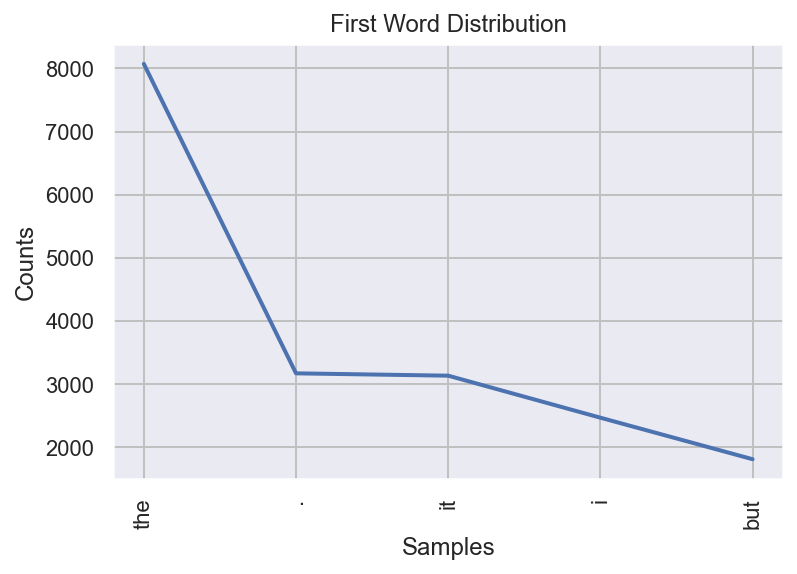

In [84]:
cfd['SS'].plot(5, title="First Word Distribution")
plt.show()

In [85]:
# I 뒤에 올 수 있는 단어는?
cfd['i'].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

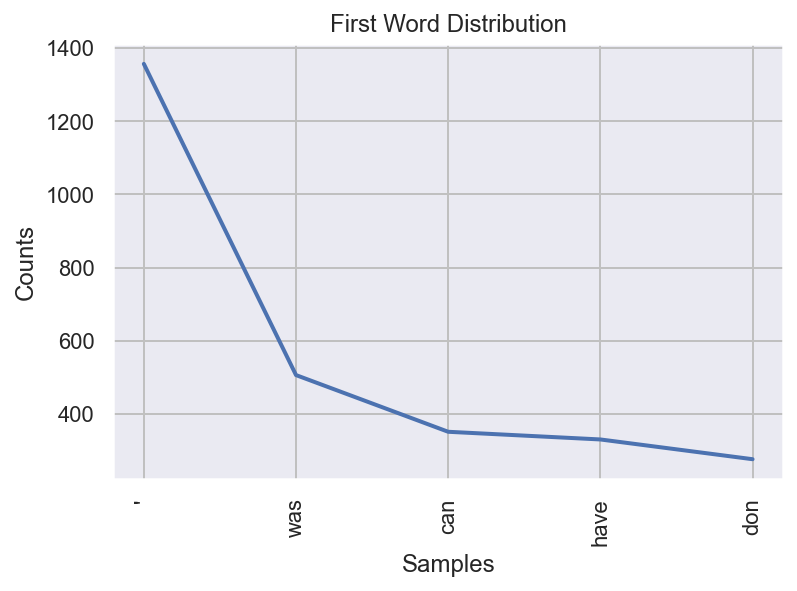

In [86]:
cfd['i'].plot(5, title="First Word Distribution")
plt.show()

In [87]:
# . 뒤에 올 수 있는 단어는?
cfd['.'].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

#### Step 3: 조건부 확률 추정

빈도를 추정하면 각각의 조건부 확률은 기본적으로 다음과 같이 추정할 수 있다.

$$ P(w\;|\; w_c) = \dfrac{C((w_c, w))}{C((w_c))} $$

위 식에서 $C(w_c, w)$은 전체 말뭉치에서 $(w_c, w)$라는 바이그램이 나타나는 횟수이고 $C(w_c)$은 전체 말뭉치에서 $(w_c)$라는 유니그램(단어)이 나타나는 횟수이다.

NLTK의 `ConditionalProbDist` 클래스에 `MLEProbDist` 클래스 팩토리를 인수로 넣어 위와 같이 빈도를 추정할 수 있다.

In [88]:
from nltk.probability import ConditionalProbDist, MLEProbDist


# MLE는 어떻게 추정할지 방식을 넣어 주는 것.
cpd = ConditionalProbDist(cfd, MLEProbDist)

이제 이 전까지는 빈도를 뱉어줬는데, 이제는 확률을 뱉어준다.

In [93]:
# 문맥을 i로 줬을 때, am이 나올 확률
cpd["i"].prob("am")

0.018562267971650354

In [90]:
cpd["i"].prob("is")

0.0002249971875351558

In [91]:
cpd["we"].prob("are")

0.08504504504504505

In [92]:
cpd["we"].prob("is")

0.0

#### Step 4:  문장 확률 계산

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다. <br>
다음으로 이 토큰열을 N-그램 형태로 분해한다. 바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타낸다. 

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다. 


다음으로 이 토큰열을 N-그램형태로 분해한다.
바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타난다.

$$ P(\text{SS I am a boy SE}) = P(\text{I}\;|\; \text{SS}) \cdot P(\text{am}\;|\; \text{I}) \cdot P(\text{a}\;|\; \text{am}) \cdot P(\text{boy}\;|\; \text{a}) \cdot P(.\;|\; \text{boy}) \cdot P(\text{SE}\;|\; .) $$



우선 다음과 같이 문장(단어 리스트)의 리스트를 만든다.

In [98]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        # 뒷부분 eps term은 혹시 0이 나올 수도 있으니깐, 아주 작은 값 넣어 놓은 것.
        # 실수에서 가장 작은 수
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [99]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

100만분의 2 정도면 높은 확률이야. 100만개 중에 이런게 2개 있을 수 있다는 거니깐. 

In [100]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

### 문장의 생성

이 모형을 기반으로 임의의 랜덤한 문장을 생성할 수 있다. <br>
SS가 있으면 그 다음에, 나올 수 있는 친구들의 분포가 있잖아. 그리고 그 각각의 확률이 있잖아.<br>
이런 확률 분포를 가진 주사위를 던지는 거야. <br>
그 다음 I가 선택이 됬으면, <br>
주사위를 바꿔, I를 컨텍스트로 가지는 주사위로 바꿔. 그럼, 또 확률분포가 나올 것이고 그에 맞는 주사위가 있겠지. <br>
이렇게 계속 반복해. <br>
SE가 나올 때 까지 던지는 거야. 

In [101]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break

        # 이게 주사위 던져주는 내장 함수
        w = cpd[c].generate()

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            # 앞글자 대문자로 만드는 함수
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [107]:
"plot".title()

'Plot'

In [102]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [103]:
generate_sentence()

'Her hair is still tom cruise ship suddenly, as there are often criticised for the portrayal of what sort of a prison, and sail for me !'

이번에는 한글 자료를 이용해보자 코퍼스로는 아래의 웹사이트에 공개된 Naver sentiment movie corpus 자료를 사용한다.
* https://github.com/e9t/nsmc


In [108]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

CPU times: user 71.9 ms, sys: 57 ms, total: 129 ms
Wall time: 3.95 s


In [109]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

docs = [row[1] for row in data]
len(docs)

150000

In [110]:
import warnings
warnings.simplefilter("ignore")

from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
    tokens = ['/'.join(t) for t in tagger.pos(doc)]
    return tokens

tokenize("그 영화는 아주 재미있었어요.")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective', './Punctuation']

In [111]:
from tqdm import tqdm
sentences = []
for d in tqdm(docs):
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

  1%|▏         | 2050/150000 [00:16<19:48, 124.53it/s]


KeyboardInterrupt: 

In [ ]:
sentences[:30]

In [ ]:
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [ ]:
korean_most_common("나", 10)

In [ ]:
korean_most_common("의", 10)

In [ ]:
korean_most_common(".", 10, "Punctuation")

In [ ]:
def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [ ]:
korean_bigram_prob("이", "영화")

In [ ]:
korean_bigram_prob("영화", "이")

In [ ]:
def korean_generate_sentence(seed=None, debug=False):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
            
        w = cpd[c].generate()

        if w == "SE":
            break

        w2 = w.split("/")[0]
        pos = w.split("/")[1]

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w

        if debug:
            print(w)

    return "".join(sentence)

In [ ]:
korean_generate_sentence(0)

In [ ]:
korean_generate_sentence(1)

In [ ]:
korean_generate_sentence(2)

In [ ]:
korean_generate_sentence(3)

In [ ]:
korean_generate_sentence(5)

# Soynlp 소개

word segmentation을 해주는 패키지. 지금까지 형태소 분석해서 tokenizing을 했었음 <br>
그런데, 지금까지 써온 형태소 분석기는 형태소에 해당되는 애들을 단어장에 다 가지고 있는 그런 형태였음. <br>
따라서, 단어장이 없으면 형태소 분석이 안됨. <br>
그런, 단어장 없이 형태소를 찾아내려고 노력하는? 패키지<br>

어떻게 노력? 글자 단위로 쪼개서, 조건부확률을 이용해봄. 

soynlp는 한국어 처리를 위한 파이썬 패키지 중 하나다. koNLPy에서 제공하는 형태소분석기는 형태소 기반으로 문서를 토큰화할 수 있는 기능을 제공하지만 새롭게 만들어진 미등록 단어들은 인식이 잘 되지 않는 단점을 가지고 있다. 이를 해결하기 위해서는 사용자 사전에 단어를 등록하는 절치를 거쳐야 한다. soynlp는 이러한 과정을 돕기 위해 사용자 사전과 형태소분석 없이 cohesion 기반으로 토큰화를 할 수 있는 기능을 제공한다.

* https://github.com/lovit/soynlp

## 패키지 설치

패키지는 다음과 같이 설치할 수 있다.

```
pip install soynlp
```

## 말뭉치 다운로드

soynlp는 koNLPy와 달리 패키지 내에서 말뭉치를 제공하지 않는다. 대신 github 레포에 예제 말뭉치 파일이 있으므로 이를 다운로드 받아서 사용하자.|

In [115]:
!wget https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt -O 2016-10-20.txt

--2021-08-22 20:51:10--  https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43694449 (42M) [text/plain]
Saving to: ‘2016-10-20.txt’

2016-10-20.txt      100%[===================>]  41.67M  10.1MB/s    in 4.0s    

2021-08-22 20:51:17 (10.5 MB/s) - ‘2016-10-20.txt’ saved [43694449/43694449]



이 파일은 하나의 문서가 한 줄로 되어 있고 각 줄 내에서 문장은 두 개의 공백으로 분리되어 있는 형식의 말뭉치다. `DoublespaceLineCorpus` 클래스로 이 말뭉치를 사용할 수 있다.

In [121]:
from soynlp import DoublespaceLineCorpus

# 문서 단위 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)  # 문서의 갯수

30091

In [122]:
# 앞 5개의 문서 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i > 4:
        break

0 
1 19  1990  52 1 22
2 오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경

In [123]:
# 문장 단위 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt", iter_sent=True)
len(corpus)  # 문장의 갯수

223357

In [124]:
# 앞 5개의 문장 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i > 4:
        break

0 19
1 1990
2 52 1 22
3 오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스
4 서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다


## 단어 추출

`WordExtractor` 클래스를 사용하면 형태소에 해당하는 단어를 분리하는 학습을 수행한다. 실제로는 각 단어 후보에 대해 cohesion 등의 

In [125]:
%%time
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.932 Gbse memory 0.899 Gb
CPU times: user 45.3 s, sys: 1.33 s, total: 46.6 s
Wall time: 47.8 s


`extract()` 메서드로 각 cohesion, branching entropy, accessor variety 등의 통계 수치를 계산할 수 있다.

In [126]:
word_score = word_extractor.extract()

all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 360721
all accessor variety was computed # words = 360721


## Cohesion

Cohesion방식으로 끊는게, 내부에서 대체 어떻게 끊고 있는가? <br>
하단의 확률을 보자. 엽합뉴스 cohesion(4)까지는 잘 가다가, '연합뉴스가'를 넣으면 확률이 뚝 떨어지겠지. 조사는 하나가 아니니깐. <br>
이렇게 확률이 뚝 떨어지는 곳에서 단어를 끊는 방식이 Cohesion방식이야

Cohesion은 문자열을 글자단위로 분리하여 부분문자열(substring)을 만들 때 왼쪽부터 문맥을 증가시키면서 각 문맥이 주어졌을 때 그 다음 글자가 나올 확률을 계산하여 누적곱을 한 값이다.

$$
\text{cohesion}(n) = \left( \prod_{i=1}^{n-1} P(c_{1:i+1} | c_{1:i}) \right)^{\frac{1}{n-1}}
$$

예를 들어 "연합뉴스가"라는 문자열이 있는 경우, 각 부분문자열의 cohesion은 다음과 같다. 한 글자는 cohesion을 계산하지 않는다.

* $cohesion(2) = P(연합 | 연)$
* $cohesion(3) = \sqrt[2]{\left( P(연합 | 연) \cdot P(연합뉴 | 연합) \right)}$
* $cohesion(4) = \sqrt[3]{\left( P(연합 | 연) \cdot P(연합뉴 | 연합) \cdot P(연합뉴스 | 연합뉴) \right)}$
* $cohesion(5) = \sqrt[4]{\left( P(연합 | 연) \cdot P(연합뉴 | 연합) \cdot P(연합뉴스 | 연합뉴) \cdot P(연합뉴스가 | 연합뉴스) \right)}$

하나의 단어를 중간에서 나눈 경우, 다음 글자를 예측하기 쉬우므로 조건부확률의 값은 크다. 하지만 단어가 종료된 다음에 여러가지 조사나 결합어가 오는 경우에는 다양한 경우가 가능하므로 조건부확률의 값이 작아진다. 따라서 cohesion값이 가장 큰 위치가 하나의 단어를 이루고 있을 가능성이 높다.

In [134]:
word_score["연합"].cohesion_forward

0.1943363253634125

In [135]:
word_score["연합뉴"].cohesion_forward

0.43154839105434084

In [136]:
word_score["연합뉴스"].cohesion_forward

0.5710254410737682

아래서 뚝떨어지지, 그러면, 기계 내부에서 "연합뉴스"까지가 하나의 단어였구나 하면서 끊고 추출하는거야.

In [137]:
word_score["연합뉴스는"].cohesion_forward

0.1535595043355021

## Branching Entropy

엔트로피를 사용한다. <br>
'연합뉴' 다음에 나올 확률을 가지고 분포를 딱 그려봐. <br>
'스'는 확률이 엄청 높을 것이고, 나머지는 엄청 낮겠지. <br>
이렇게 되면 엔트로피가 0에 가까이 나오겠지. 하나에 거의 다 몰렸으니깐. <br>
<br>
그러면, 이제 연합뉴스라고 하고 그 다음을 찾아. <br>
그러면, 가/는/에서 등등이 여러개가 분포되어 있겠지. 엔트로피가 높아짐. <br>
이 엔트로피를 기준으로 단어를 끊는 것. <br><br>

논리적으로 생각을 해보면, '연합뉴스'에서 다음 분포 찾아보니깐, 엔트로피가 갑자기 확 높아졌어. 그러면 여기까지가 단어였나 보다 하고 추측하겠지

Branching Entropy는 조건부 확률의 값이 아니라 확률분포의 엔트로피값을 사용한다. 만약 하나의 단어를 중간에서 끊으면 다음에 나올 글자는 쉽게 예측이 가능하다 즉, 여러가지 글자 중 특정한 하나의 글자가 확률이 높다. 따라서 엔트로피값이 0에 가까운 값으로 작아진다. 하지만 하나의 단어가 완결되는 위치에는 다양한 조사나 결합어가 올 수 있으므로 여러가지 글자의 확률이 비슷하게 나오고 따라서 엔트로피값이 높아진다.  

In [138]:
word_score["연합"].right_branching_entropy

0.42721236711742844

In [142]:
# '연합뉴' 다음에는 항상 '스'만 나온다.
# 스 말고 아무것도 없으니깐, '연합뉴'상태에서 다음에 나올 것을 가지고 분포를 그려보면 그 분포의 엔트로피가 0이 나온다는 거야. 
word_score["연합뉴"].right_branching_entropy

-0.0

In [140]:
word_score["연합뉴스"].right_branching_entropy

3.8967810761022053

In [141]:
word_score["연합뉴스는"].right_branching_entropy

0.410116318288409

## Accessor Variety

연합뉴 다음에 나올 수 있는 글자가 몇종류냐? '스' 1글자 <br>
엔트로피를 일일이 계산하기 귀찮으니깐, 글자 종류만 계산해서 그 종류가 갑자기 많아지는 곳에서 끊겠지. 

Accessor Variety는 확률분포를 구하지 않고 단순히 특정 문자열 다음에 나올 수 있는 글자의 종류만 계산한다. 글자의 종류가 많다면 엔트로피가 높아지리 것이라고 추정하는 것이다. 

In [143]:
word_score["연합"].right_accessor_variety

42

In [144]:
# '연합뉴' 다음에는 항상 '스'만 나온다.
# 여기선 절대로 끊으면 안되지. 
word_score["연합뉴"].right_accessor_variety

1

In [147]:
# 여기서 끊어야 된다는 뜻. 
word_score["연합뉴스"].right_accessor_variety

158

In [146]:
word_score["연합뉴스는"].right_accessor_variety

2

soynlp는 이렇게 계산된 통계수치를 사용하여 문자열을 토큰화하는 방법도 제공한다. soynlp가 제공하는 토큰화 방법은 두 가지다.

* 띄어쓰기가 잘 되어 있는 경우: L-토큰화
* 띄어쓰기가 안되어 있는 경우: Max Score 토큰화

## L-토큰화

한글에서만 되는 방식, <br>
조사나 어미 등을 찾으면 그 앞에 있는게 단어인 경우가 많음. ~가 ~는<br> 
이렇게 특정한 어미나 조사 앞에 나오는 애들을 찾아내는 방식

한국어의 경우 공백(띄어쓰기)으로 분리된 하나의 문자열은 'L 토큰 + R 토큰; 구조인 경우가 많다. 왼쪽에 오는 L 토큰은 체언(명사, 대명사)이나 동사, 형용사 등이고 오른쪽에 오는 R 토큰은 조사, 동사, 형용사 등이다. 여러가지 길이의 L 토큰의 점수를 비교하여 가장 점수가 높 L단어를 찾는 것이 L-토큰화(L-tokenizing)이다. soynlp에서는 `LTokenizer` 클래스로 제공한다.

In [148]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", flatten=False)

[('안전', '성에'),
 ('문제', '있는'),
 ('스마트폰', '을'),
 ('휴대', '하고'),
 ('탑승', '할'),
 ('경우', '에'),
 ('압수', '한다')]

## 최대 점수 토큰화

최대 점수 토큰화(max score tokenizing)는 띄어쓰기가 되어 있지 않는 긴 문자열에서 가능한 모든 종류의 부분문자열을 만들어서 가장 점수가 높은 것을 하나의 토큰으로 정한다. 이 토큰을 제외하면 이 위치를 기준으로 전체 문자열이 다시 더 작은 문자열들로 나누어지는데 이 문자열들에 대해 다시 한번 가장 점수가 높은 부분문자열을 찾는 것을 반복한다. 

In [149]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("안전성에문제있는스마트폰을휴대하고탑승할경우에압수한다")

['안전',
 '성에',
 '문제',
 '있는',
 '스마트폰',
 '을',
 '휴대',
 '하고',
 '탑승',
 '할',
 '경우',
 '에',
 '압수',
 '한다']

## 단어 임베딩과 word2vec

[reference](https://dreamgonfly.github.io/blog/word2vec-explained/)

단어 임베딩(Word Embedding)이란 텍스트를 구성하는 하나의 단어를 수치화하는 방법의 일종이다. 

텍스트 분석에서 흔히 사용하는 방식은 단어 하나에 인덱스 정수를 할당하는 Bag Of Wrods방법이다. 이 방법을 사용하면 문서는 단어장에 있는 단어의 갯수와 같은 크기의 벡터가 되고 단어장의 각 단어가 그 문서에 나온 횟수만큼 벡터의 인덱스 위치의 숫자를 증가시킨다. 

즉, 단어장이 "I", "am", "a", "boy", "girl" 다섯개의 단어로 이루어진 경우 각 단어에 다음과 같은 숫자를 할당한다. 

```
I : 0
am : 1
a : 2
boy : 3
girl : 4
```

`I am a girl`이라는 문서는 다음과 같이 벡터를 할당한다

$$ [1 \; 1 \; 1 \; 0 \; 1] $$


아이디어의 시작은, BOW의 인코딩에서 그 인덱스는 아무 의미가 없는 숫자야. 단어장의 위치일 뿐. 단어장 만들다 보니깐, 어쩌다가 그런 순서가 됬을 뿐이야. 좀 의미가 있는 숫자로 바꾸면 어떨까? 라는 게 생각의 시작. 


단어 임베딩은 하나의 단어를 하나의 인덱스 정수가 아니라 실수 벡터로 나타낸다. 예를 들어 2차원 임베딩을 하는 경우 다음과 같은 숫자 벡터가 될 수 있다.
각 단어를 가지고, 숫자를 보통 벡터로 만든다. 보통 벡터는 100, 1000이렇게 하는데, 여기서는 예를 들기 위해서 벡터의 길이를 짧게 표현했다. 
***어쨋든 이렇게 단어를 숫자 벡터로 만드는 것을 word embedding 이라고 한다.***

<pre>
"I": (0.3, 0.2) 
"am": (0.1, 0.8) 
"a": (0.5, 0.6) 
"boy": (0.2, 0.9) 
"girl": (0.4, 0.7)
</pre>

### Feed-Forward 신경망 언어 모형 (Neural Net Language Model)


이러한 단어 임베딩은 신경망을 이용하여 언어 모형을 만들려는 시도에서 나왔다. 자세한 내용은 다음 논문을 참고한다.

"A Neural Probabilistic Language Model", Bengio, et al. 2003

http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
"Efficient Estimation of Word Representations in Vector Space", Mikolov, et al. 2013

https://arxiv.org/pdf/1301.3781v3.pdf
"word2vec Parameter Learning Explained", Xin Rong,

http://www-personal.umich.edu/~ronxin/pdf/w2vexp.pdf


V개의 단어를 가지는 단어장이 있을 때, 단어를 BOW 방식으로 크기 V인 벡터로 만든 다음 다음 그림과 같이 하나의 은닉층(Hidden Layer)을 가지는 신경망을 사용하여 특정 단어 열(word sequence)이 주어졌을 때 다음에 나올 단어를 예측하는 문제를 생각해 보자. 입력과 출력은 모두 BOW 방식으로 인코딩되어 있다.

이 신경망을 가지고 bigram 모델을 만들려고 했던 거야. 하나의 단어를 넣으면, 다른 단어가 나올 각각의 확률을 계산해 주는 모델. 이 시도를 하다 보니깐, 뉴럴 네트웍을 훈련시키는 과정에서, 단어 하나에 대한 vector가 결정이 되더라. 

![1_34.jpeg](./materials/1_34.jpeg)

뉴럴네트워크 훈련시키는 과정에서 단어 하나에 대한 벡터가 자동으로 결정되더라. 
이 벡터를 가지고, 그 단어의 벡터표시라고 이야기 하자. 이렇게 정했다는 거야. 그냥. 

만들고 나니깐, 이런 현상이 발생하더라. 
man에서 woman으로 가는 방향을 king에 적용시키니깐 queen이 되고, walking에서 walked로 가는 방향을 swimming에 적용시키니깐, swam이 되고. <br>

그러니깐, 이 위에서 만들어진 숫자라는게 아무 의미 없는 숫자가 아니였다는 거야. 



![1_35.png](./materials/1_35.png)

어 의미가 있는 숫자였네? 하고 놀란거야. <br>
이 숫자로 쓰면 성능이 더 나아지지 않을까? 라고 생각을 했고, 실제로 해보니깐 성능이 나아지더라. 

***그래서, 인공신경망에서 텍스트 쓸때는, word2vec이 기본이다.***

입력 $x$가 들어가면 입력 가중치 행렬 $W^T$이 곱해져서 은닉층 벡터 $h$가 되는데 $x$가 one-hot-encoding 된 값이므로 $h$ 벡터는 입력 가중치 행렬 $W$의 행 하나가 된다.

$$ h = W^T x = v^T_i $$
여기에서 $i$는 입력 벡터 $x$ 의 값이 1인 원소의 인덱스이다. 즉, BOW 단어장에서 $i$번째 단어를 뜻한다.

벡터 $h$는 다시 출력 가중치 행렬 $W'^T$와 곱해져서 출력 벡터 $y$가 된다.

$$ y = W'^T h $$
출력 가중치 행렬 $W'$의 $j$번째 열을 $v_j$라고 하면 출력 벡터 $y$의 $j$번째 원소의 값은 다음과 같다.

$$ y_j = v_j'^T h $$
가중치 행렬을 갱신하는 최적화 공식을 살펴본다. 자세한 유도과정은 논문을 참조한다.

우선 출력 가중치 행렬의 갱신 공식은 다음과 같다.

$$ v_j'^{\text{(new)}} = v_j'^{\text{(old)}} - \eta \cdot e_j \cdot h = v_j'^{\text{(old)}} - \eta \cdot e_j \cdot v_i^T $$
이 식에서 $\eta$는 최적화 스텝 사이즈, $e_j$는 출력 오차가 된다. 이 공식에 따르면 벡터 $v'_j$는 $v_j$ 방향으로 수렴해 간다. 즉, $i$번째 단어와 $j$번째 단어가 연속하는 관계라면 $v'_j$가 $v_i$와 유사한 위치로 수렴한다는 뜻이다.

다음으로 입력 가중치 행렬의 갱신 공식은 다음과 같다.

$$ v_i^{\text{(new)}} = v_i^{\text{(old)}} - \eta \sum_k e_j \cdot w'_{ik}$$
이 공식에 따르면 벡터 $v_i$는 여러 $v'_k$ 벡터의 가중합으로 수렴해 간다. 이렇게 단어간의 관계에 의해 $i$번째 단어를 뜻하는 $v_i$의 값들이 연관성을 가지게 되는데 이 $v_i$ 벡터 값을 해당 단어에 대한 분산 표현 (distributed representation) , 벡터 표현 (vector representation) 또는 단어 임베딩 (word embedding)이라고 한다.

### CBOW (Continuous Bag of Words) Embedding
위의 방식은 하나의 단어로부터 다음에 오는 단어를 예측하는 문제였다. 이러한 문제를 단어 하나짜리 문맥(single-word context)를 가진다고 한다.

CBOW (Continuous Bag of Words) 방식은 복수 단어 문맥(multi-word context)에 대한 문제 즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제이다. 즉, 문자에서 나오는 $n$개의 단어 열로부터 다음 단어를 예측하는 문제가 된다. 예를 들어

the quick brown fox jumped over the lazy dog

라는 문장에서 (the, quick, brown) 이라는 문맥이 주어지면 fox라는 단어를 예측해야 한다.

CBOW는 다음과 같은 신경망 구조를 가진다. 여기에서 각 문맥 단어를 은닉층으로 투사하는 가중치 행렬은 모든 단어에 대해 공통으로 사용한다.

## Skip-Gram Embedding
Skip-Gram 방식은 CBOW 방식과 반대로 특정한 단어로부터 문맥이 될 수 있는 단어를 예측한다. 보통 입력 단어 주변의 $k$개 단어를 문맥으로 보고 예측 모형을 만드는데 이 $k$ 값을 window size 라고 한다.

위 문장에서 window size $k=1$인 경우,

quick -> the
quick -> brown
brown -> quick
brown -> fox
과 같은 관계를 예측할 수 있어야 한다.

## word2vec
word2vec은 CBOW 방식과 Skip-Gram 방식의 단어 임베딩을 구현한 C++ 라이브러리로 구글에 있던 Mikolov 등이 개발하였다.

파이썬에서는 gensim이라는 패키지에 Word2Vec이라는 클래스로 구현되어 있다. nltk의 영화 감상 corpus를 기반으로 Word2Vec 사용법을 살펴보자.

우선 단어 임베딩을 위한 코퍼스를 만든다. 코퍼스는 리스트의 리스트 형태로 구현되어야 한다. 내부 리스트는 하나의 문장을 이루는 단어 열이 된다.

실습

어쨋든 중요한 것은, word2vec이라는 것은, 모든 단어를 어떤 공간상에서 점/벡터로 표현했다는 거야. <br>
여기서 두 단어가 비슷했다면 그 두 단어가 공간상에서 비슷한 위치에 위치하고 있었다는 것을 의미하는 것. 

In [150]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sanghyuk/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [156]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [157]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

Word2Vec 클래스 객체 생성. 이 시점에서 트레이닝이 이루어진다.

In [161]:
from gensim.models.word2vec import Word2Vec

In [164]:
model = Word2Vec(sentences)

트레이닝이 완료되면 init_sims 명령으로 필요없는 메모리를 unload시킨다.

In [165]:
model.init_sims(replace=True)

이제 이 모형에서 다음과 같은 메서드를 사용할 수 있다. 보다 자세한 내용은 https://radimrehurek.com/gensim/models/word2vec.html 를 참조한다.

- similarity : 두 단어의 유사도 계산
- most_similar : 가장 유사한 단어를 출력


In [171]:
model.wv.similarity('actor', 'actress')

0.88528365

In [174]:
model.wv.similarity('he', 'she')

0.83871925

In [173]:
model.wv.similarity('actor', 'she')

0.21760216

In [176]:
model.wv.most_similar("accident")

[('boat', 0.8631150126457214),
 ('plane', 0.8621909618377686),
 ('meeting', 0.8497859239578247),
 ('mansion', 0.8488954901695251),
 ('emergency', 0.8418273329734802),
 ('church', 0.8348101377487183),
 ('conversation', 0.8311033248901367),
 ('dinner', 0.8297747373580933),
 ('ball', 0.82585209608078),
 ('ant', 0.8234671354293823)]

most_similar 메서드는 positive 인수와 negative 인수를 사용하여 다음과 같은 단어간 관계도 찾을 수 있다.

she + (actor - actress) = he 

In [177]:
model.wv.most_similar(positive=['actor', 'she'], negative='actress', topn=1)

[('he', 0.2888539433479309)]


더 많은 한국어 코퍼스를 사용한 단어 임베딩 모형은 다음 웹사이트에서 테스트해 볼 수 있다.

http://w.elnn.kr/
